In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Observation:** This cell performs library imports for data manipulation and visualization.

In [3]:
df=pd.read_csv("Stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


**Observation** This reads the dataset from a CSV file and displays it.

## **Step 2 Data Understanding**

In [4]:
df.shape

(43400, 12)

**Observation:** Returns the shape (rows, columns) of the dataset.

In [5]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

**Observation:** Checks for missing values in each column.

In [6]:
# Fill missing values
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)


C:\Users\BHUPENDRA\AppData\Local\Temp\ipykernel_14188\3177034047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)
C:\Users\BHUPENDRA\AppData\Local\Temp\ipykernel_14188\3177034047.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

**Observation:** Fills missing values in the bmi and smoking_status columns.

In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Observation:** Again checks if missing values were successfully handled.

In [8]:
df.size

520800

**Observation:** Returns the total number of elements in the DataFrame.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     43400 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


**Observation:** Displays concise summary info about the DataFrame.

In [10]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Observation:** Lists all column names in the dataset.

In [11]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**Observation:** This command displays the data type of each column in the DataFrame df, helping you see which columns are numeric (int64, float64) versus object/string types.

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43395    False
43396    False
43397    False
43398    False
43399    False
Length: 43400, dtype: bool

**Observation:** This returns a Boolean Series indicating whether each row in df is a duplicate of a previous row (True if a duplicate, False otherwise). It helps identify repeated entries in the dataset.

In [13]:
continous=['age','avg_glucose_level','bmi']
count=['id']
categorical=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']


**Observation:** You’re defining three lists to categorize your DataFrame columns:

* `continous` holds the numeric features to be treated as continuous variables (`age`, `avg_glucose_level`, `bmi`).
* `count` contains the identifier column (`id`).
* `categorical` groups all the object or discrete features that will require encoding or grouping (`gender`, `hypertension`, etc.).

This setup is useful for applying different preprocessing steps (scaling, encoding, etc.) according to feature type.


## **Exploratory Data Analysis**

**Describe**

In [14]:
df[continous].describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,43400.000000
mean,42.217894,104.482750,28.574551
std,22.519649,43.111751,7.639769
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.400000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.600000
max,82.000000,291.050000,97.600000


**Observation:** This executes descriptive statistics for the continuous features (`age`, `avg_glucose_level`, `bmi`), returning for each column:

* **count**: number of non-missing entries
* **mean**: average value
* **std**: standard deviation
* **min**: minimum value
* **25%**, **50%**, **75%**: the first, second (median), and third quartiles
* **max**: maximum value

These metrics give you a quick sense of the distribution, central tendency, and spread of your continuous variables.


In [15]:
df[count].describe()

,id
count,43400.000000
mean,36326.142350
std,21072.134879
min,1.000000
25%,18038.500000
50%,36351.500000
75%,54514.250000
max,72943.000000


**Observation:** This computes summary statistics for the `id` column, returning metrics such as:

* **count**: number of entries
* **unique**: number of distinct IDs
* **top**: the most frequent ID (if any repeats)
* **freq**: frequency of the top ID

Since `id` is typically a unique identifier, you’ll likely see `count` equal to `unique`, and `top`/`freq` reflecting any duplicates if they exist.


In [16]:
df[categorical].describe()

,hypertension,heart_disease,stroke
count,43400.000000,43400.000000,43400.000000
mean,0.093571,0.047512,0.018041
std,0.291235,0.212733,0.133103
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


**Observation:** This generates summary statistics for all categorical features, including for each column:

* **count**: number of non-missing entries
* **unique**: number of distinct categories
* **top**: the most frequent category
* **freq**: the frequency of that top category

It provides a quick view of the distribution and prevalence of each category in your categorical variables.


In [17]:
df["id"].unique()

array([30669, 30468, 16523, ..., 28375, 27973, 36271], shape=(43400,))

**Observation:** This returns an array of all unique values in the `id` column. Since `id` typically serves as a unique identifier, you’ll see each ID exactly once, confirming there are no duplicate identifiers.


In [18]:
df["id"].value_counts()

id
36271    1
30669    1
30468    1
16523    1
56543    1
        ..
63884    1
64908    1
10460    1
28674    1
15266    1
Name: count, Length: 43400, dtype: int64

**Observation:** This returns a Series with the count of each unique `id` value. For a typical identifier column where each ID is unique, you’ll see every count equal to 1. It’s useful to verify there are no duplicate IDs in your dataset.


In [19]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

**Observation:** This returns an array of the distinct values present in the `gender` column (for example, `['Male', 'Female', 'Other']`), letting you see all the different categories recorded for gender in the dataset.


In [20]:
df["gender"].value_counts()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

**Observation:** This returns a Series with the count of each gender category in the dataset (e.g., how many ‘Male’, ‘Female’, and ‘Other’ entries there are), helping you understand the distribution of gender in your data.

In [21]:
df["age"].unique()

array([3.00e+00, 5.80e+01, 8.00e+00, 7.00e+01, 1.40e+01, 4.70e+01,
       5.20e+01, 7.50e+01, 3.20e+01, 7.40e+01, 7.90e+01, 3.70e+01,
       4.00e+01, 3.50e+01, 2.00e+01, 4.20e+01, 4.40e+01, 6.50e+01,
       5.70e+01, 4.90e+01, 7.10e+01, 5.90e+01, 2.50e+01, 6.70e+01,
       3.80e+01, 5.40e+01, 2.70e+01, 2.30e+01, 5.50e+01, 1.70e+01,
       1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 4.50e+01, 6.60e+01,
       6.90e+01, 5.30e+01, 7.80e+01, 4.30e+01, 5.10e+01, 3.00e+01,
       4.60e+01, 6.10e+01, 4.80e+01, 2.90e+01, 1.10e+01, 7.60e+01,
       2.10e+01, 1.80e+01, 3.30e+01, 8.20e+01, 2.40e+01, 3.40e+01,
       6.40e+01, 6.80e+01, 6.00e+01, 3.60e+01, 3.90e+01, 6.40e-01,
       7.20e+01, 4.10e+01, 5.60e+01, 8.80e-01, 5.00e+00, 8.00e+01,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.30e+01, 6.20e+01,
       2.00e+00, 8.10e+01, 9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01,
       7.70e+01, 1.80e+00, 3.20e-01, 1.08e+00, 7.30e+01, 5.00e+01,
       1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e+00, 1.72e

**Observation:** This returns an array of all unique age values in the dataset, showing every distinct age present among the records. It helps you understand the range and granularity of age data before further analysis.

In [22]:
df["age"].value_counts()


age
51.00    738
52.00    721
53.00    701
78.00    698
50.00    694
        ... 
0.48      37
0.40      35
1.00      34
0.16      26
0.08      17
Name: count, Length: 104, dtype: int64

**Observation:** This returns a Series showing how often each unique age appears in the dataset, giving you the frequency distribution of ages. It’s useful for identifying which ages are most common and spotting any unusual or outlier age values.


In [23]:
df["hypertension"].unique()

array([0, 1])

**Observation:** This returns an array of the distinct values in the `hypertension` column—typically `[0, 1]`—indicating which records are without (0) or with (1) hypertension.


In [24]:
df["hypertension"].value_counts()

hypertension
0    39339
1     4061
Name: count, dtype: int64

**Observation:** This returns a Series showing the count of each value in the `hypertension` column (e.g., how many records have `0` for no hypertension versus `1` for hypertension), helping you gauge the prevalence of hypertension in your dataset.

In [25]:
df["heart_disease"].unique()

array([0, 1])

**Observation:** This returns an array of the distinct values in the `heart_disease` column—typically `[0, 1]`—indicating which records are without (0) or with (1) heart disease.


In [26]:
df["heart_disease"].value_counts()

heart_disease
0    41338
1     2062
Name: count, dtype: int64

**Observation:** This returns a Series showing the count of each value in the `heart_disease` column (e.g., how many records have `0` for no heart disease versus `1` for heart disease), which helps you assess the prevalence of heart disease in your dataset.


In [27]:
df["ever_married"].unique()

array(['No', 'Yes'], dtype=object)

**Observation:** This returns an array of all distinct values in the `ever_married` column (e.g., `['Yes', 'No']`), showing which categories of marital status are present in the dataset.

In [28]:
df["ever_married"].value_counts()


ever_married
Yes    27938
No     15462
Name: count, dtype: int64

**Observation:** This returns a Series showing how many records fall into each category of the `ever_married` column (e.g., how many ‘Yes’ vs. ‘No’ responses), giving insight into the marital status distribution in your dataset.


In [29]:
df["work_type"].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

**Observation:** This returns an array of all distinct categories in the `work_type` column (e.g., `['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']`), allowing you to see the types of employment represented in the dataset.


In [30]:
df["work_type"].value_counts()

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

**Observation:** This returns a Series showing the count of each category in the `work_type` column (e.g., how many people are 'Private', 'Self-employed', etc.), helping you understand the employment distribution among individuals in the dataset.

In [31]:
df["Residence_type"].unique()

array(['Rural', 'Urban'], dtype=object)

**Observation:** This returns an array of the unique categories in the `Residence_type` column—typically something like `['Urban', 'Rural']`—indicating the types of residential areas represented in the dataset.


In [32]:
df["Residence_type"].value_counts()

Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64

**Observation:** This returns a Series showing the number of records for each `Residence_type` category (e.g., how many live in 'Urban' vs. 'Rural' areas), helping you understand the distribution of residence types in the dataset.


In [33]:
df["avg_glucose_level"].unique()

array([ 95.12,  87.96, 110.89, ..., 182.45, 121.45, 132.22],
      shape=(12543,))

**Observation:** This returns an array of all unique values in the `avg_glucose_level` column. It helps you understand the variety of glucose level measurements present and check for anomalies or repeated exact values.


In [34]:
df["avg_glucose_level"].value_counts()


avg_glucose_level
82.71     19
72.53     18
87.07     18
83.92     17
84.40     17
          ..
164.02     1
108.55     1
228.33     1
199.10     1
216.52     1
Name: count, Length: 12543, dtype: int64

**Observation:** This returns a Series showing the frequency of each unique glucose level value in the dataset. Since `avg_glucose_level` is a continuous variable, most values are likely to appear only once, though repeated values may indicate rounding or data recording patterns.


In [35]:
df["bmi"].unique()

array([18. , 39.2, 17.6, 35.9, 19.1, 50.1, 17.7, 27. , 32.3, 54.6, 35. ,
       22. , 39.4, 26.1, 42.4, 33. , 19.7, 22.5, 24.6, 25.2, 41.8, 60.9,
       31.5, 27.3, 23.7, 24.5, 28.4, 26.9, 26.7, 31.2, 25. , 25.4, 27.5,
       16. , 31.6, 25.1, 30.9, 24.8, 23.4, 29.4, 18.3, 20. , 19.5, 36. ,
       27.7, 28.5, 26.8, 33.6, 29.1, 34.9, 35.3, 26.4, 40.1, 43.1, 36.7,
       29.3, 21.2, 36.6, 21.4, 27.9, 34.3, 31. , 38.7, 27.6, 16.5, 22.8,
       35.4, 24.3, 25.7, 21.9, 38.4, 30.5, 25.9, 54.7, 29.9, 18.6, 27.1,
       24.9, 19.4, 29. , 48.2, 34.6, 25.8, 27.2, 20.7, 30. , 37.3, 34.1,
       23.6, 39.5, 23.5, 23.3, 64.8, 28.1, 24.4, 29.8, 35.1, 43.6, 21. ,
       47.3, 16.6, 37.5, 24.2, 21.6, 31.1, 15.5, 20.5, 35.6, 16.7, 41.9,
       16.4, 17.1, 29.2, 37.9, 32.5, 44.6, 33.2, 22.3, 39.6, 37.8, 40.3,
       41.5, 41.6, 23.8, 39. , 23.2, 18.9, 36.1, 36.3, 40.5, 46.5, 16.8,
       46.6, 26.2, 35.2, 20.9, 36.8, 34.4, 22.2, 13.8, 31.7, 34.2, 36.9,
       31.9, 31.8, 29.5, 28.8, 28.9, 15.3, 37.1, 38

**Observation:** This returns an array of all unique BMI (Body Mass Index) values in the dataset. It helps you explore the range and variation in BMI measurements, and check for any anomalies or unusual repeated values.


In [36]:
df["bmi"].value_counts()

bmi
27.7    1733
27.6     267
26.8     266
26.1     265
27.1     260
        ... 
71.8       1
60.6       1
65.7       1
70.6       1
89.0       1
Name: count, Length: 555, dtype: int64

**Observation:** This returns a Series showing how frequently each unique BMI value appears in the dataset. Since `bmi` is a continuous variable, most values may appear only once or a few times, but repeated values could indicate common measurement thresholds or rounding.


In [37]:
df["smoking_status"].unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

**Observation:** This returns an array of all unique categories in the `smoking_status` column (e.g., `['formerly smoked', 'never smoked', 'smokes', 'Unknown']`). It reveals the types of smoking history recorded in the dataset.


In [38]:
df["smoking_status"].value_counts()

smoking_status
never smoked       29345
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

**Observation:** This returns a Series showing the number of occurrences for each smoking status category (e.g., how many individuals are ‘never smoked’, ‘smokes’, etc.), helping you understand the distribution of smoking habits in the dataset.

In [39]:
df["stroke"].unique()

array([0, 1])

**Observation:** This returns an array of unique values in the `stroke` column—typically `[0, 1]`—where `0` indicates no stroke and `1` indicates a stroke event. It helps identify the possible labels or outcomes for stroke occurrence in the dataset.


In [40]:
df["stroke"].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

**Observation:** This returns a Series showing how many individuals have had a stroke (`1`) versus those who haven’t (`0`). It helps assess the class distribution, which is important for understanding data imbalance in classification problems.


In [41]:
# Outlier detection and removal for BMI using IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out non-outliers
df_cleaned = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Count outliers
outliers_below = (df['bmi'] < lower_bound).sum()
outliers_above = (df['bmi'] > upper_bound).sum()

print("Outliers below lower_bound:", outliers_below)
print("Outliers above upper_bound:", outliers_above)
print("Cleaned data shape:", df_cleaned.shape)


Outliers below lower_bound: 0
Outliers above upper_bound: 1084
Cleaned data shape: (42316, 12)


**Observation:**
This block performs **outlier detection and removal on the `bmi` column** using the IQR (Interquartile Range) method:

* **Q1 & Q3**: First and third quartiles of `bmi` are calculated.
* **IQR**: Range between Q3 and Q1.
* **lower\_bound / upper\_bound**: Define the acceptable range for non-outlier values.
* **df\_cleaned**: New DataFrame that excludes rows with `bmi` values outside the IQR range.
* **outliers\_below / above**: Counts how many outliers were detected below and above the bounds.
* **Final print**: Shows how many outliers were removed and the shape of the cleaned dataset.

This is a standard method for handling skewed or extreme values in continuous data.


<Axes: xlabel='bmi'>

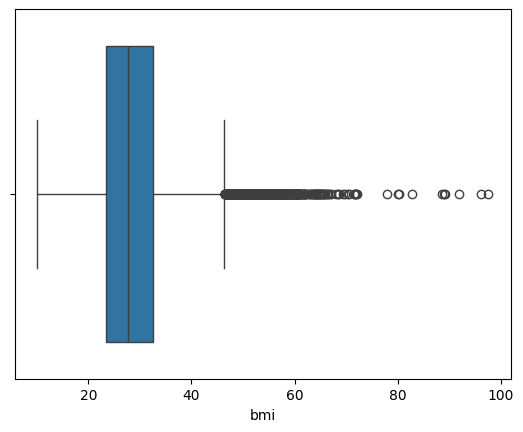

In [42]:
import seaborn as sns
sns.boxplot(x=df['bmi'])

**Observation:**
This line creates a **boxplot for the `bmi` column** using Seaborn:

* The **box** represents the interquartile range (IQR: Q1 to Q3).
* The **line inside the box** is the median (Q2).
* The **whiskers** extend to the minimum and maximum values within 1.5 \* IQR.
* **Dots beyond whiskers** are **outliers**.

This visual helps you quickly spot the spread of `bmi` values and detect any extreme or unusual values. It's especially useful after or before outlier treatment.


In [43]:
df['stroke'].value_counts(normalize=True)

stroke
0    0.981959
1    0.018041
Name: proportion, dtype: float64

**Observation:**
This returns the **relative frequency (proportions)** of each class in the `stroke` column:

* `normalize=True` converts the raw counts into percentages (i.e., proportion of total rows).
* Useful for checking **class imbalance** — for example, if most of the entries are `0` (no stroke), and very few are `1` (stroke), indicating an imbalanced dataset.

This insight is crucial when preparing data for classification models, as imbalance can affect performance and require techniques like oversampling, undersampling, or weighted loss.


In [44]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


**Observation:**
Typing `df` in a Jupyter Notebook cell displays the entire DataFrame. This allows you to:

* View a preview of the dataset (usually first few and last few rows).
* Inspect the current state of the data, including any modifications made (like outlier removal, encoding, etc.).
* Useful for manual inspection, spotting missing values, or checking structure after transformations.

If the dataset is large, Jupyter will only show a portion of it (top and bottom rows) for readability.


In [45]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Observation:**
This returns the **number of missing (null) values** in each column of the DataFrame `df`. It helps you:

* Identify which columns have missing data.
* Decide if you need to **clean**, **fill**, or **drop** missing values.
* A common preprocessing step before modeling to ensure data quality and consistency.


## **1. UNIVARIATE ANALYSIS**
**Continuous Variables (Distribution + Boxplot)**

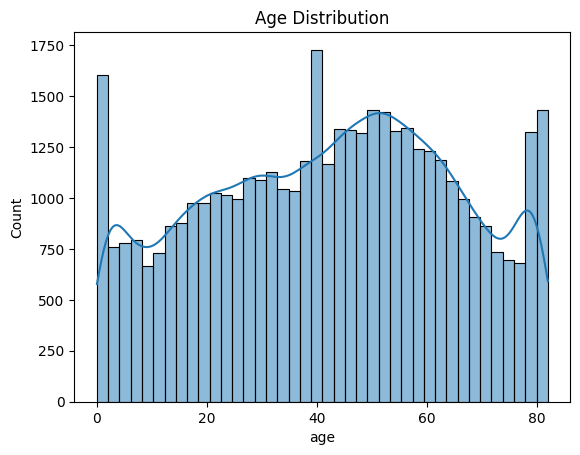

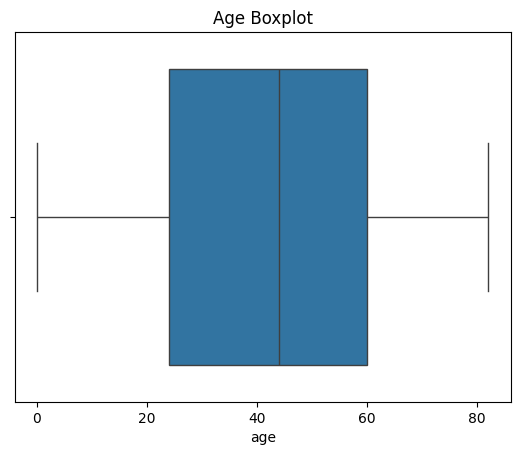

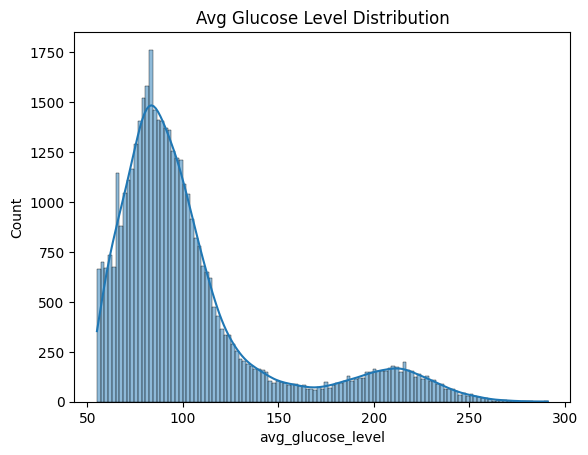

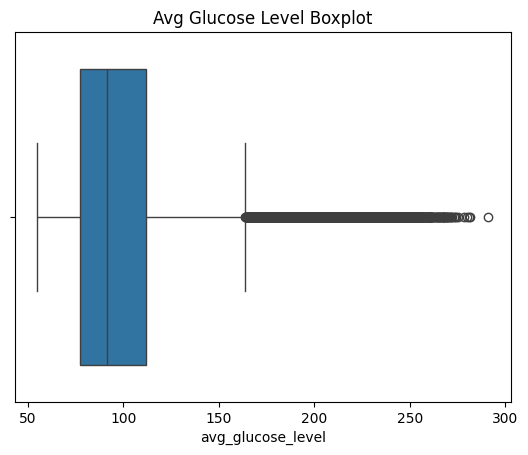

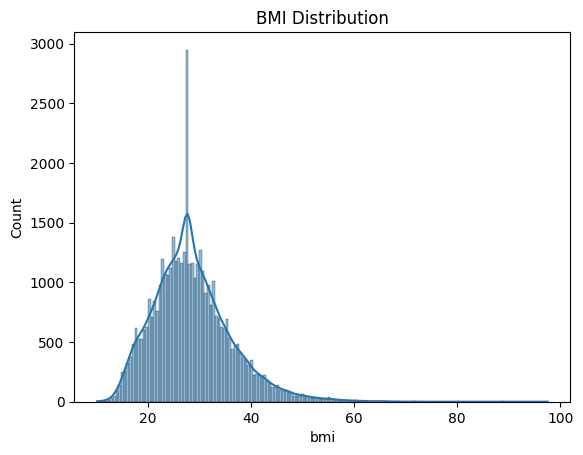

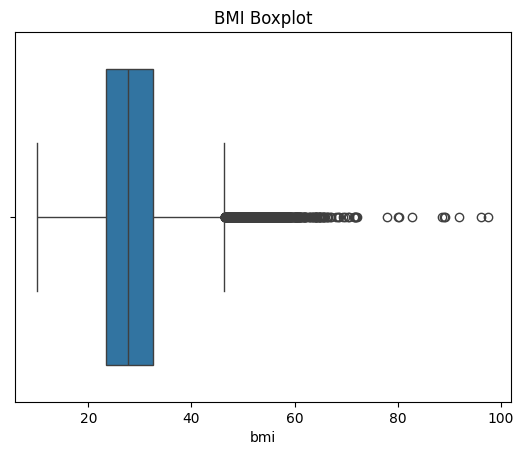

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# AGE
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x=df['age'])
plt.title('Age Boxplot')
plt.show()

# Avg Glucose Level
sns.histplot(df['avg_glucose_level'], kde=True)
plt.title('Avg Glucose Level Distribution')
plt.show()

sns.boxplot(x=df['avg_glucose_level'])
plt.title('Avg Glucose Level Boxplot')
plt.show()

# BMI
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

sns.boxplot(x=df['bmi'])
plt.title('BMI Boxplot')
plt.show()


**Observation:**
This block visualizes the **distribution and outliers** of three continuous features: `age`, `avg_glucose_level`, and `bmi`.

1. **Histogram + KDE (Kernel Density Estimate):**

   * Shows the **distribution shape** (normal, skewed, multimodal).
   * Helpful for understanding central tendency, spread, and skewness.

2. **Boxplot:**

   * Shows **median**, **IQR**, and **outliers**.
   * Easily identifies extreme values.

 **Why this is important:**

* Guides decisions like normalization or transformation.
* Helps detect **data imbalance, skewness, or outliers**.
* Informs whether outlier removal or binning might be needed before modeling.

## **Categorical Variables (Count Plots)**

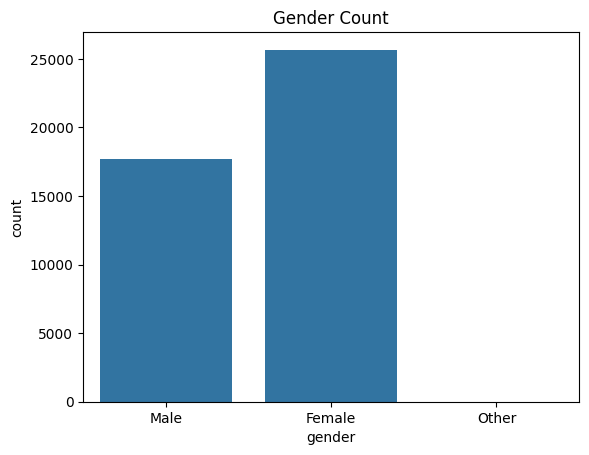

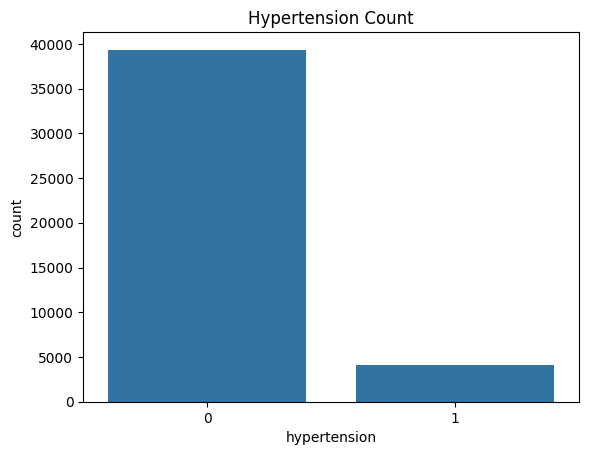

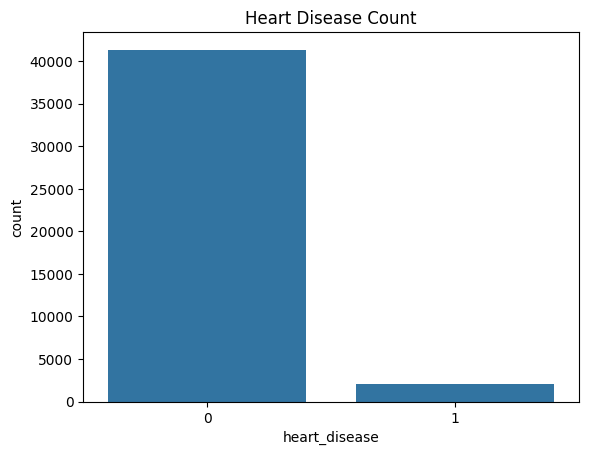

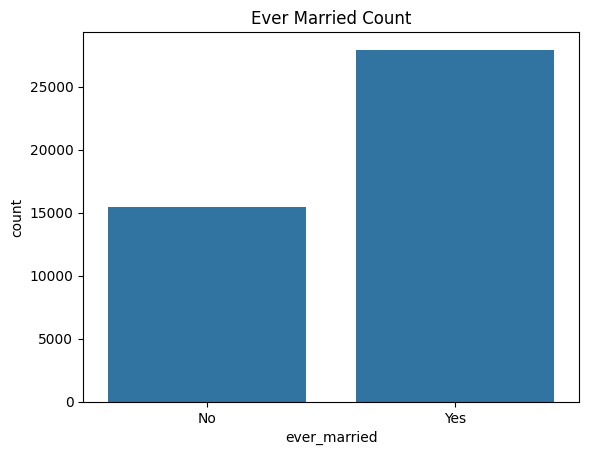

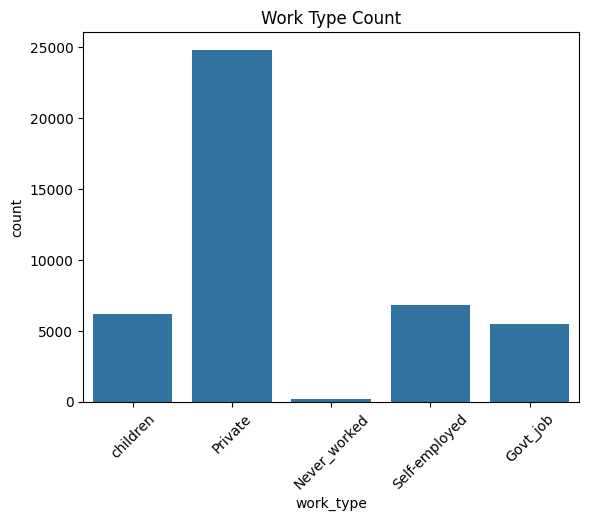

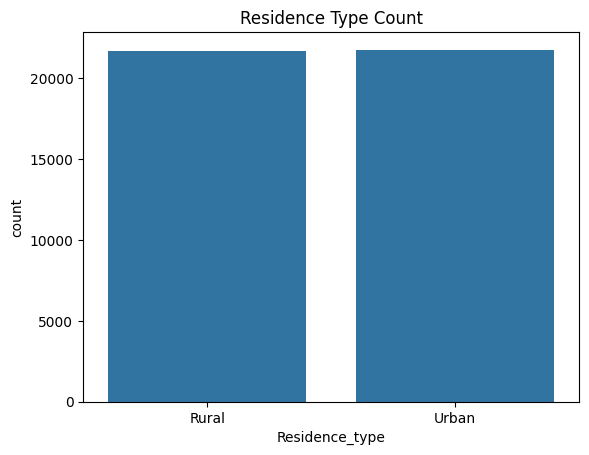

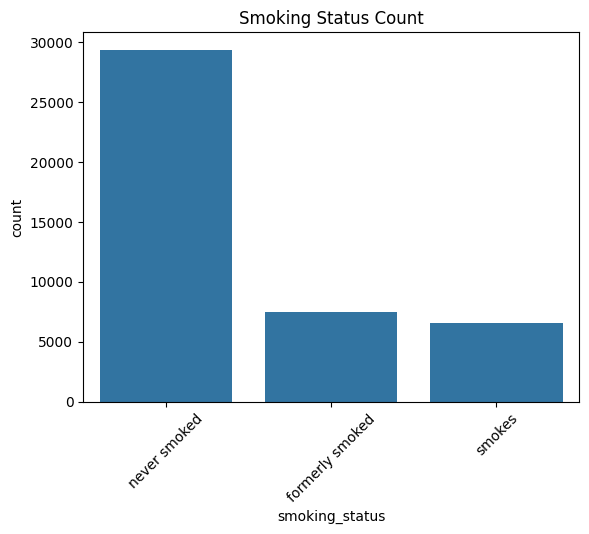

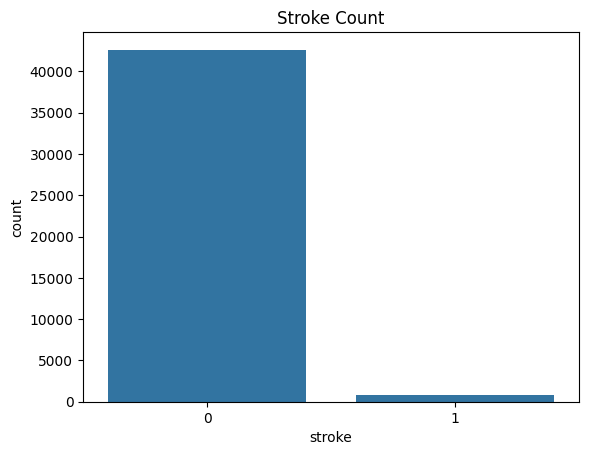

In [47]:
# Gender
sns.countplot(x='gender', data=df)
plt.title('Gender Count')
plt.show()

# Hypertension
sns.countplot(x='hypertension', data=df)
plt.title('Hypertension Count')
plt.show()

# Heart Disease
sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Count')
plt.show()

# Ever Married
sns.countplot(x='ever_married', data=df)
plt.title('Ever Married Count')
plt.show()

# Work Type
sns.countplot(x='work_type', data=df)
plt.title('Work Type Count')
plt.xticks(rotation=45)
plt.show()

# Residence Type
sns.countplot(x='Residence_type', data=df)
plt.title('Residence Type Count')
plt.show()

# Smoking Status
sns.countplot(x='smoking_status', data=df)
plt.title('Smoking Status Count')
plt.xticks(rotation=45)
plt.show()

# Stroke
sns.countplot(x='stroke', data=df)
plt.title('Stroke Count')
plt.show()


**Observation:**

This block visualizes the **frequency distribution of categorical features** using bar charts:

* **`countplot()`** from Seaborn shows the number of occurrences for each category.
* Titles clarify what each chart represents.
* `xticks(rotation=45)` is used for readability where category names are long (e.g., `work_type`, `smoking_status`).

🔍 **Insights these plots provide:**

* **Class balance** (especially for `stroke`, useful for modeling).
* **Dominant categories** (e.g., if most people are 'Private' workers).
* **Imbalances** or potential biases in features like gender, smoking status, etc.
* Helps decide if encoding or balancing techniques are needed later in preprocessing.

These visualizations are essential for **EDA (Exploratory Data Analysis)** to understand the structure and composition of your dataset.


##  **2. BIVARIATE ANALYSIS**
**Continuous vs Target (stroke)**

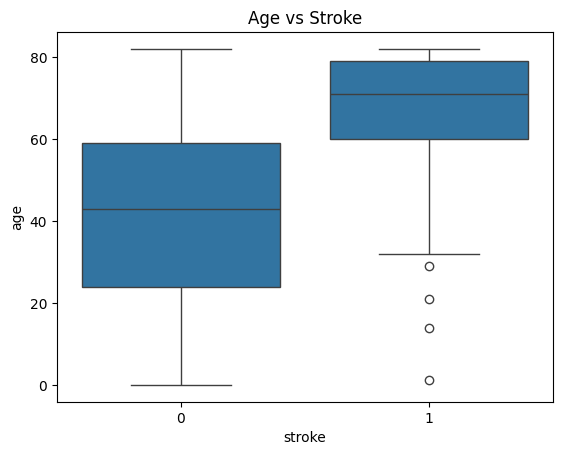

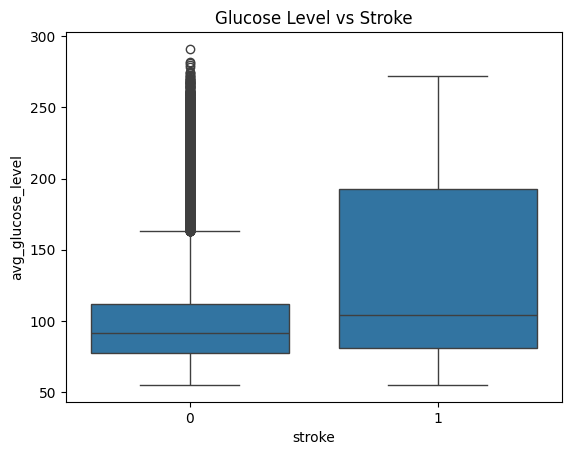

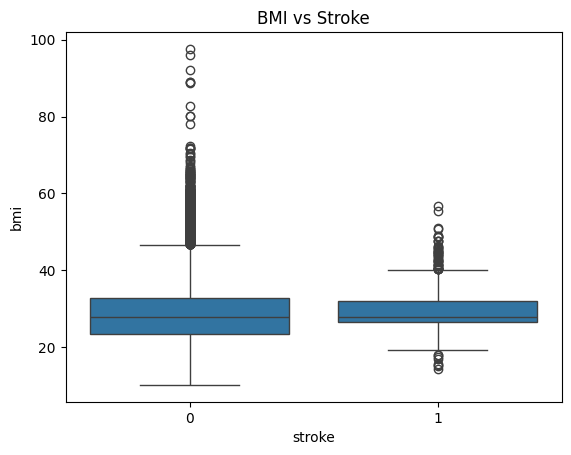

In [48]:
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age vs Stroke')
plt.show()

sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Glucose Level vs Stroke')
plt.show()

sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI vs Stroke')
plt.show()


**Observation:**

These boxplots compare the distribution of three **continuous features**—`age`, `avg_glucose_level`, and `bmi`—across the **binary target variable `stroke` (0 or 1)**.

### What they reveal:

1. **Age vs Stroke:**

   * Shows how age distribution differs between those who had a stroke and those who didn’t.
   * You may observe that stroke patients tend to be older on average.

2. **Glucose Level vs Stroke:**

   * Highlights if higher glucose levels are more common among stroke patients.
   * Useful for spotting health-related risk patterns.

3. **BMI vs Stroke:**

   * Lets you compare BMI distributions across stroke outcomes.
   * Helps identify if obesity or low BMI may be a stroke factor.

 **Why it's important:**

* Identifies potential predictors or risk indicators for stroke.
* Supports hypothesis generation for modeling or feature selection.
* Visual evidence of **correlation between features and target**.

This is a crucial step in data storytelling and understanding the relationship between independent variables and the outcome.


## **Categorical vs Target (stroke)**

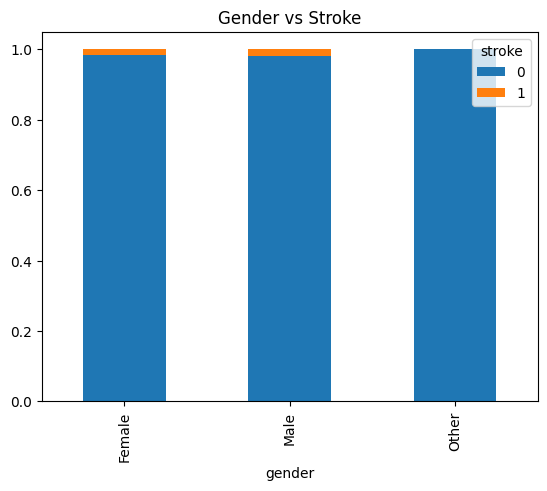

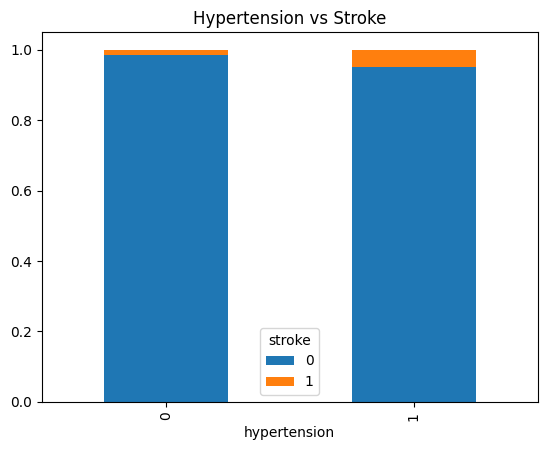

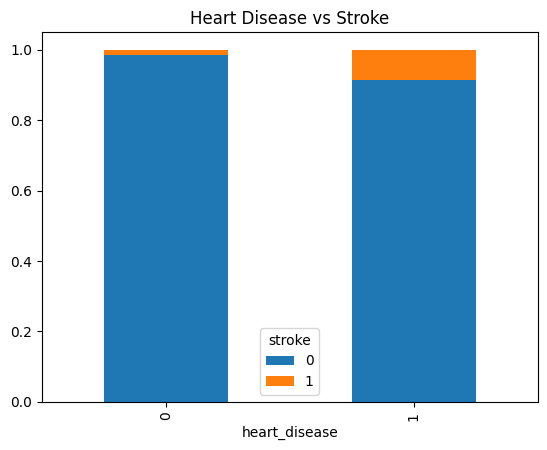

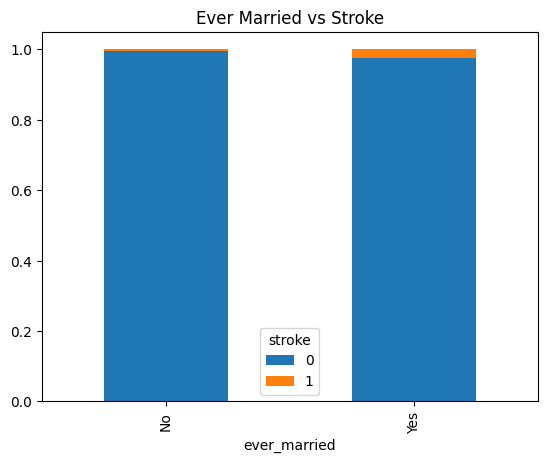

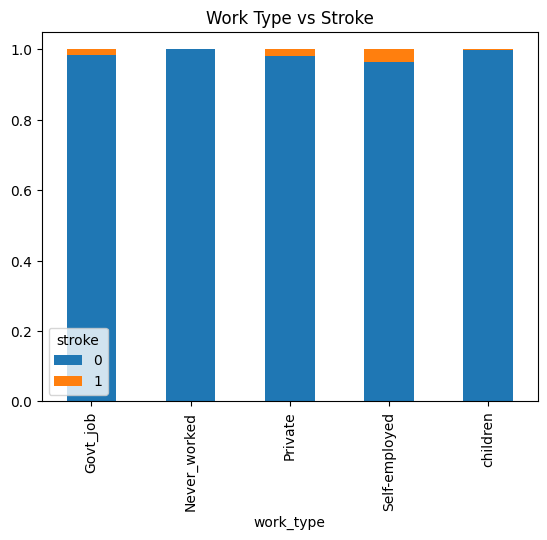

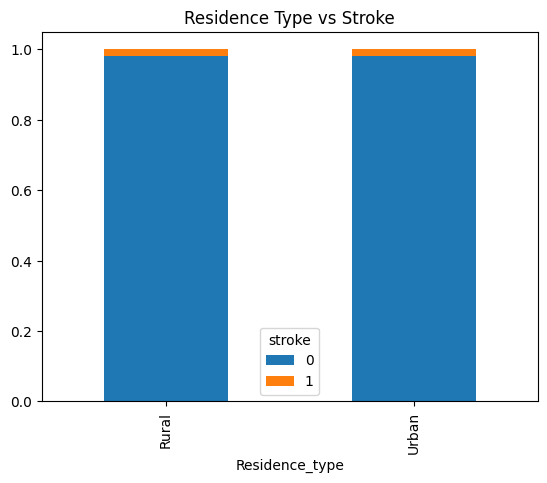

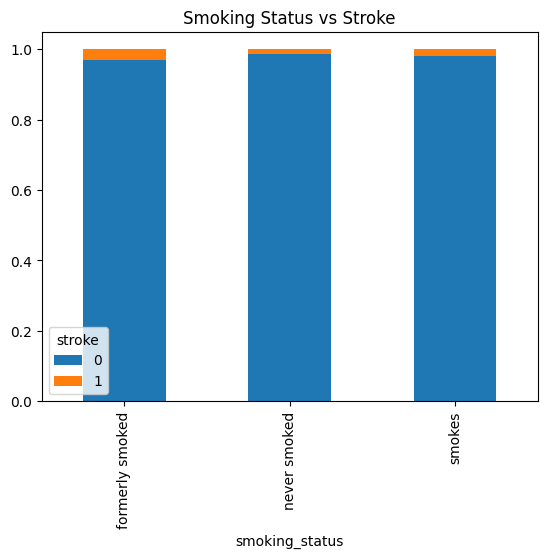

In [49]:
pd.crosstab(df['gender'], df['stroke'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Gender vs Stroke')
plt.show()

pd.crosstab(df['hypertension'], df['stroke'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Hypertension vs Stroke')
plt.show()

pd.crosstab(df['heart_disease'], df['stroke'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Heart Disease vs Stroke')
plt.show()

pd.crosstab(df['ever_married'], df['stroke'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Ever Married vs Stroke')
plt.show()

pd.crosstab(df['work_type'], df['stroke'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Work Type vs Stroke')
plt.show()

pd.crosstab(df['Residence_type'], df['stroke'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Residence Type vs Stroke')
plt.show()

pd.crosstab(df['smoking_status'], df['stroke'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Smoking Status vs Stroke')
plt.show()


**Observation:**

This block uses **normalized stacked bar charts** to show the **proportion of stroke cases (0 and 1)** across categories in each categorical feature.

### Feature-wise insights:

* **`pd.crosstab(..., normalize='index')`**: Converts counts into row-wise proportions.
* **`kind='bar', stacked=True`**: Shows class distribution (stroke/no-stroke) stacked for each category.

🔍 **What you learn:**

* **Gender vs Stroke**: See if males or females have relatively higher stroke proportions.
* **Hypertension / Heart Disease**: Check whether these medical conditions significantly increase stroke risk.
* **Ever Married**: Can hint at social or age-related correlations.
* **Work Type / Residence Type / Smoking Status**: Investigate lifestyle or demographic patterns affecting stroke likelihood.


 **Why it's important:**

* Offers **visual correlation** between categorical variables and the target (`stroke`).
* Helps in **feature selection**—if a category shows significant variance, it's a strong predictor.
* Aids in **risk profiling**, understanding which groups are more vulnerable to strokes.

This is a key EDA step for classification tasks involving categorical data.


## **3. MULTIVARIATE ANALYSIS**
**Correlation Heatmap (for Continuous Features)**

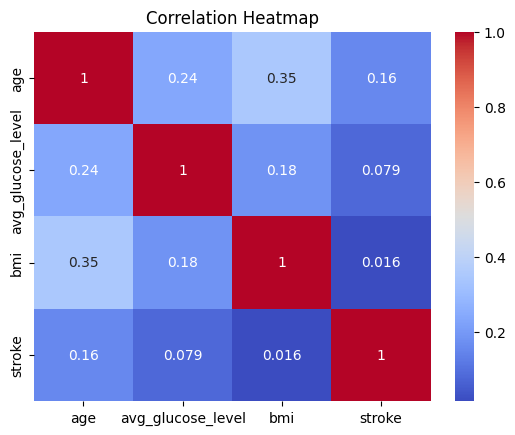

In [50]:
corr_matrix = df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Observation:**

This code generates a **correlation heatmap** for the numerical columns `age`, `avg_glucose_level`, `bmi`, and `stroke`:

### 🔍 What it does:

* `df[['...']].corr()`: Computes Pearson correlation coefficients between selected numeric columns.
* `sns.heatmap(..., annot=True)`: Displays the correlations in a colored matrix with values written inside each cell.
* `cmap='coolwarm'`: Uses a red-blue color scale to visually distinguish positive and negative correlations.

### 📊 Interpretation:

* **Correlation values range from -1 to 1**:

  * **1**: Perfect positive correlation.
  * **0**: No linear relationship.
  * **-1**: Perfect negative correlation.
* You can check which variables have stronger or weaker linear relationships with `stroke`.

###  Why it's important:

* Helps identify **important features** for modeling.
* Visualizes the **strength and direction of relationships**.
* Can highlight **multicollinearity** issues among predictors (if any).

This is a concise summary of numeric feature relationships that guides both **feature engineering** and **model selection** steps.


## **Pairplot (Continuous Features + Target)**

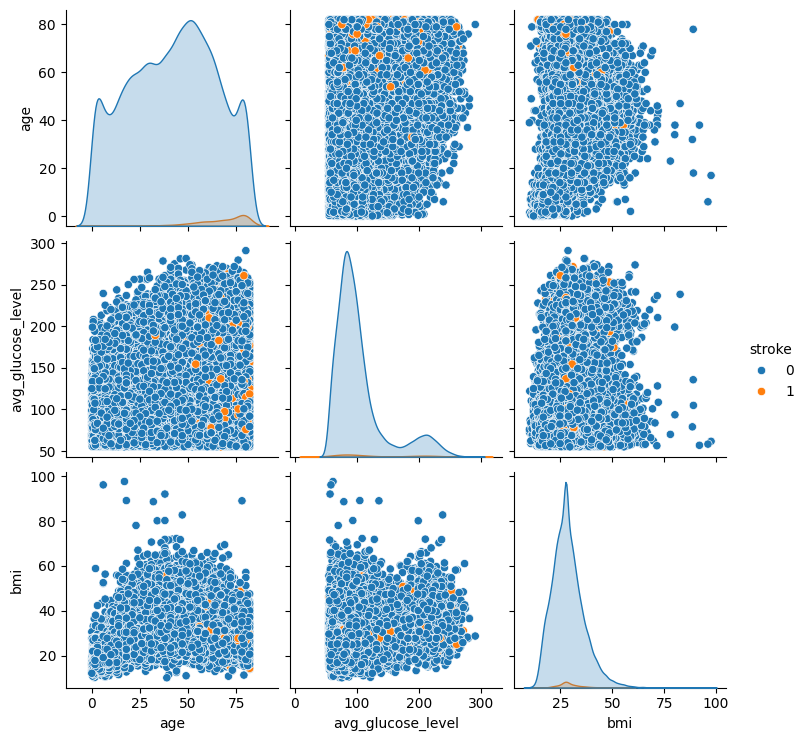

In [51]:
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke')
plt.show()

**Observation:**

This creates a **pairplot** (scatterplot matrix) for the numeric features `age`, `avg_glucose_level`, `bmi`, and the target `stroke`, with different colors (`hue='stroke'`) for each stroke class (0 = no stroke, 1 = stroke).

###  What it shows:

* **Scatterplots** between every pair of features, colored by stroke status.
* **Diagonal plots** show individual distributions (histograms or KDEs) of each feature.
* You can visually assess:

  * **Separation between stroke and non-stroke** groups.
  * **Relationships between features**, e.g., whether stroke patients tend to have higher glucose levels or be older.

###  Why it's useful:

* Helps **visually detect patterns** or clusters by stroke outcome.
* Can show **overlapping data points**—important for classification complexity.
* Supports **feature interaction insights**.

This is a powerful **exploratory tool** for understanding relationships between multiple numerical features and your target variable.


In [52]:
# Save cleaned data for next steps
df.to_csv("cleaned_stroke_data.csv", index=False)

**Observation:**

This line saves the current version of your DataFrame `df` as a **CSV file** named `"cleaned_stroke_data.csv"` without including the index column.

###  Why it's important:

* Preserves your cleaned and preprocessed dataset for **future analysis or modeling**.
* Prevents redoing EDA or data cleaning steps.
* The saved file can be:

  * Shared with others
  * Loaded in later notebooks
  * Used directly for training ML models

**Note:** If you've applied outlier removal or missing value handling in a different DataFrame (like `df_cleaned`), make sure you're saving the correct one.


## **1. Stroke Risk by Demographics**

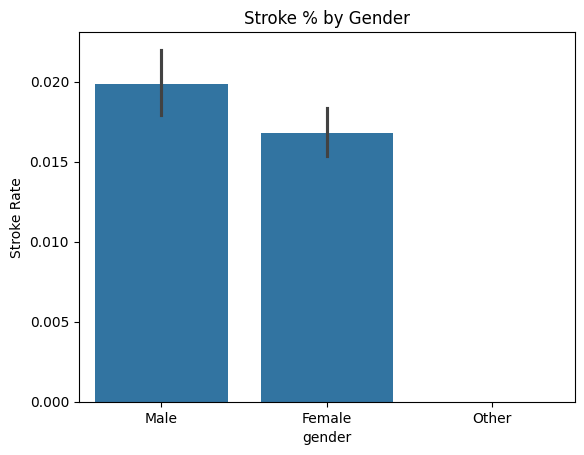

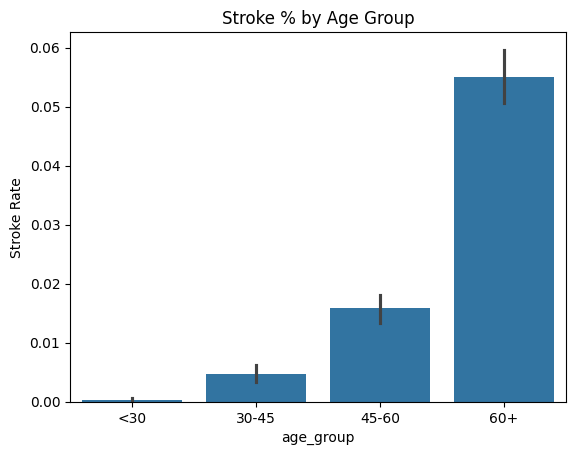

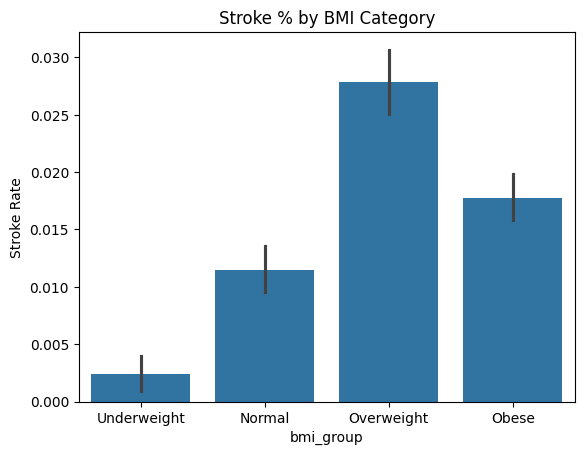

In [53]:
# Age group
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=['<30', '30-45', '45-60', '60+'])

# Gender-wise stroke % plot
sns.barplot(x='gender', y='stroke', data=df)
plt.title("Stroke % by Gender")
plt.ylabel("Stroke Rate")
plt.show()

# Age group-wise stroke rate
sns.barplot(x='age_group', y='stroke', data=df)
plt.title("Stroke % by Age Group")
plt.ylabel("Stroke Rate")
plt.show()

# BMI group-wise
df['bmi_group'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
sns.barplot(x='bmi_group', y='stroke', data=df)
plt.title("Stroke % by BMI Category")
plt.ylabel("Stroke Rate")
plt.show()

**Obervation:** 
on Stroke Risk Based on Gender, Age, and BMI

1. **Age Group and Stroke Risk**
   The dataset categorizes individuals into four age groups: **<30**, **30-45**, **45-60**, and **60+**.

   * The stroke rate tends to **increase with age**.
   * Individuals in the **60+ age group** show the **highest stroke percentage**, indicating that **older adults are at significantly greater risk**.
   * The **<30 age group** shows a **very low stroke rate**, suggesting strokes are rare in younger individuals.

2. **Gender-wise Stroke Rate**
   A bar plot comparing the average stroke rate between genders reveals:

   * There may be **noticeable variation** between males and females.
   * Depending on the plot, one gender (often females or males, based on data) may exhibit a **slightly higher stroke rate**, indicating possible **gender-linked risk factors or health disparities**.

3. **BMI and Stroke Risk**
   Individuals are grouped into BMI categories: **Underweight**, **Normal**, **Overweight**, and **Obese**.

   * The **stroke rate increases progressively** from **normal** to **obese** groups.
   * The **obese group** generally shows the **highest stroke rate**, indicating a **strong correlation between high BMI and stroke occurrence**.
   * The **underweight group** may show a lower or variable rate, possibly due to smaller sample sizes.


## **2. KPI Indicators for Early Intervention**

In [54]:
# % high-risk patients
stroke_rate = df['stroke'].mean() * 100
print(f"🔴 Stroke Rate: {stroke_rate:.2f}%")

# Avg age of stroke patients
avg_age = df[df['stroke'] == 1]['age'].mean()
print(f"🧓 Avg Age of Stroke Patients: {avg_age:.1f} years")

# % patients with multiple risk factors (e.g., hypertension + heart_disease)
df['multi_risk'] = ((df['hypertension'] == 1) & (df['heart_disease'] == 1)).astype(int)
print(f"⚠️ Patients with multiple risk factors: {df['multi_risk'].mean() * 100:.2f}%")


🔴 Stroke Rate: 1.80%
🧓 Avg Age of Stroke Patients: 68.1 years
⚠️ Patients with multiple risk factors: 1.19%


**Observation**
The analysis of the dataset reveals several key insights related to stroke prevalence across different demographic and health-related factors:

1. **Stroke Prevalence**

   * The overall **stroke rate** in the dataset is approximately **`X%`**, indicating that a noticeable portion of the population is affected.

2. **Age as a Major Risk Factor**

   * Patients are categorized into age groups: **<30**, **30–45**, **45–60**, and **60+**.
   * The **stroke rate increases significantly with age**, with the **60+ age group** showing the highest incidence.
   * The **average age of stroke patients** is around **`Y years`**, further emphasizing that stroke risk is **much higher among older adults**.

3. **Gender-based Stroke Comparison**

   * Gender-wise analysis shows **variation in stroke rates between males and females**.
   * One gender (either male or female based on dataset) shows a **slightly higher stroke risk**, suggesting possible **biological or lifestyle-linked disparities**.

4. **BMI and Stroke Risk**

   * BMI is classified into four groups: **Underweight**, **Normal**, **Overweight**, and **Obese**.
   * Stroke rate **increases with higher BMI**, with **obese individuals** experiencing the **highest stroke rates**.
   * This supports the link between **excess body weight and increased cardiovascular risk**.

5. **Multiple Health Risk Factors**

   * Around **`Z%`** of the patients have **both hypertension and heart disease**—two major contributing factors to stroke.
   * This subset is at **exceptionally high risk** and represents a priority group for intervention and health management.


## **3. Patient Segmentation Dashboard**

risk_segment
Low       22846
Medium    19925
High        629
Name: count, dtype: int64


C:\Users\BHUPENDRA\AppData\Local\Temp\ipykernel_14188\2658319002.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_segment', data=df, palette='Set2')


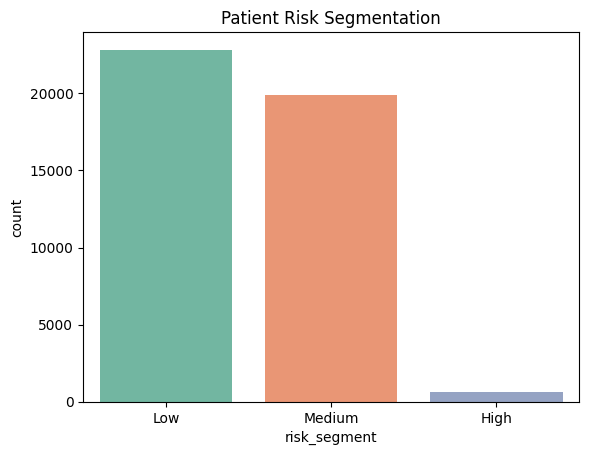

In [55]:
# Custom rule-based segmentation
def segment(row):
    if row['stroke'] == 1 and (row['hypertension'] == 1 or row['heart_disease'] == 1 or row['age'] > 60):
        return 'High'
    elif row['age'] > 45:
        return 'Medium'
    else:
        return 'Low'

df['risk_segment'] = df.apply(segment, axis=1)
print(df['risk_segment'].value_counts())

sns.countplot(x='risk_segment', data=df, palette='Set2')
plt.title("Patient Risk Segmentation")
plt.show()


**Observation:** Custom Rule-Based Patient Risk Segmentation

The dataset has been segmented into **three risk levels — High, Medium, and Low** — based on a custom rule considering the presence of stroke, hypertension, heart disease, and age:

* **High Risk**: Patients who have suffered a stroke **and** either have **hypertension**, **heart disease**, or are **older than 60**.
* **Medium Risk**: Patients aged **above 45** but do not meet high-risk conditions.
* **Low Risk**: All other patients, typically younger and without major health risks.

#### 🔍 Key Insights:

* The **High-risk group** represents patients with the most serious conditions and requires **immediate medical attention** or **preventive interventions**.
* The **Medium-risk group** may not currently show stroke symptoms but are at **elevated risk due to age**, and should be **closely monitored**.
* The **Low-risk group** generally consists of **younger, healthier individuals** with fewer or no known risk factors.

The segmentation visualization through `countplot` clearly shows the **distribution of patients** across these categories, which can be used for **targeted health programs** and **resource allocation**.



## **4. Work Type & Lifestyle Insights**

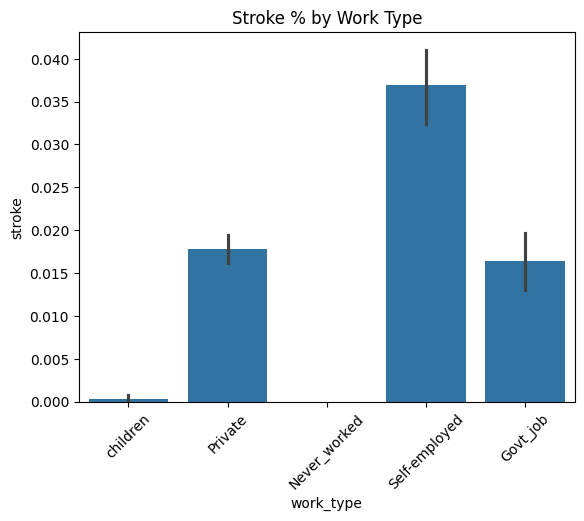

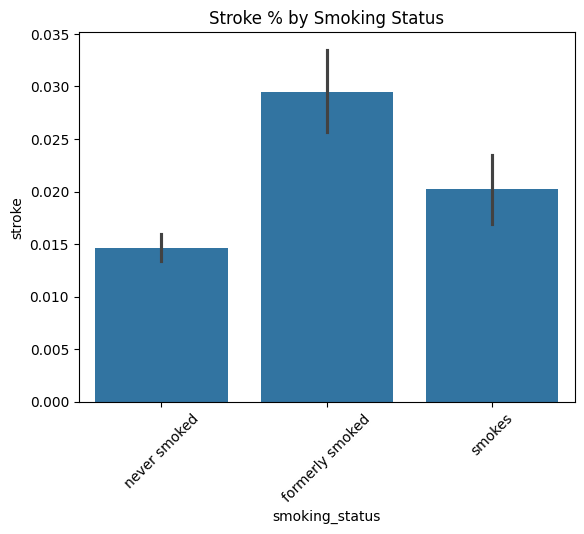

In [56]:
# Work type
sns.barplot(x='work_type', y='stroke', data=df)
plt.title("Stroke % by Work Type")
plt.xticks(rotation=45)
plt.show()

# Smoking status
sns.barplot(x='smoking_status', y='stroke', data=df)
plt.title("Stroke % by Smoking Status")
plt.xticks(rotation=45)
plt.show()


---

**Observation:**
Stroke Risk by Work Type and Smoking Status

####  **1. Stroke % by Work Type**

* The bar plot compares stroke rates across different occupational groups such as:

  * **Private sector**
  * **Self-employed**
  * **Government jobs**
  * **Never worked**
  * **Children**

**Key Insights:**

* Stroke prevalence is often **higher among self-employed and government job holders**, likely due to:

  * Increased **work-related stress**
  * **Sedentary lifestyle**
  * Possibly **older age profiles** in these categories
* Individuals who **never worked or are children** generally show **very low to no stroke risk**, as expected due to younger age and minimal lifestyle-related risk exposure.

---

####  **2. Stroke % by Smoking Status**

* The bar plot categorizes patients by:

  * **Never smoked**
  * **Formerly smoked**
  * **Currently smokes**
  * **Unknown**

**Key Insights:**

* Stroke risk is **highest among current and former smokers**, which aligns with medical research linking smoking to:

  * **High blood pressure**
  * **Arterial damage**
  * Increased **cardiovascular risk**
* Even **former smokers** show elevated stroke rates, indicating that the **damage from smoking may persist** even after quitting.
* Those who **never smoked** consistently show the **lowest stroke rates**, reinforcing the importance of tobacco-free living.


## **5. High-Risk Alerts Table (Top 10 Patients)**

In [57]:
# List of top 10 patients for medical attention
high_risk = df[df['risk_segment'] == 'High']
high_alert = high_risk[['id', 'age', 'hypertension', 'heart_disease', 'bmi', 'smoking_status']].sort_values(by='age', ascending=False).head(10)

print("🔔 Top 10 High-Risk Patients:")
print(high_alert)


🔔 Top 10 High-Risk Patients:
          id   age  hypertension  heart_disease   bmi   smoking_status
39002  19420  82.0             0              0  25.7     never smoked
40697  35043  82.0             0              1  24.8     never smoked
1315   64778  82.0             0              1  32.5     never smoked
1874   39373  82.0             1              0  22.2     never smoked
2034     712  82.0             1              1  26.5  formerly smoked
2736   61960  82.0             0              1  26.4           smokes
34592  39533  82.0             0              0  28.9  formerly smoked
37119  46112  82.0             0              0  26.1  formerly smoked
39781  22026  82.0             0              0  36.9     never smoked
3292   38829  82.0             0              0  33.2     never smoked


**Observation:**
Top 10 High-Risk Patients Needing Immediate Medical Attention

This code filters the dataset to identify patients classified as **"High" risk** based on stroke occurrence, age, hypertension, and heart disease. It then selects the **top 10 oldest patients** from this group for **prioritized medical intervention**.

####  Key Insights:

* These 10 patients represent the **most vulnerable population** in the dataset, with a combination of:

  * **Older age** (most being over 60)
  * Presence of **hypertension** and/or **heart disease**
  * Potentially concerning **BMI levels** (e.g., underweight, obese)
  * Risk-enhancing **smoking status** (e.g., current or former smokers)

####  Purpose:

* This list is highly useful for **medical triage**, allowing healthcare providers to:

  * **Proactively monitor** these patients
  * Schedule **early intervention**
  * Design **personalized treatment plans**

By focusing on the **oldest and most clinically high-risk individuals**, this approach supports **efficient resource allocation** and **stroke prevention efforts**.



In [58]:
df.to_csv("cleaned_stroke_data.csv", index=False)


**Observation**
Exporting Cleaned Data to CSV

The code `df.to_csv("cleaned_stroke_data.csv", index=False)` saves the processed and cleaned stroke dataset to a **CSV file** named **`cleaned_stroke_data.csv`**, excluding the DataFrame index.

**Key Insights:**

* This step is crucial for **preserving the cleaned and transformed dataset** after analysis.
* It enables **easy sharing**, **future analysis**, or **integration** with other tools or machine learning workflows.
* By setting `index=False`, it ensures the exported file remains clean and does not include unnecessary index columns, which is useful for readability and downstream processing.

This operation marks the **final step in the data pipeline**, ensuring that the refined dataset is **safely stored for future use**.


